In [1]:
import numpy as np
import os
import sys
import glob
import pandas as pd
from pathlib import Path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.metrics.metrics import ModelPerformance, Metrics

model_name = 'ProjNetMerged4'
filepaths = glob.glob('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/'
    f'models/predict_loco/{model_name}/csv/*')

filepaths.sort()

filepath = filepaths[-1]
print(filepath)
#mp = ModelPerformance.load(filepath=filepath)
#mp['Model'] = model_name

df_loco = pd.read_csv(filepath)
df_loco = df_loco[df_loco['noisy'] == False]
df_loco = df_loco[df_loco['tweening'] == False]


#df = df[df['centerID'] == 'Bern']
df_loco = df_loco.drop(columns = ['massive_filename'])
#df = df[['patientID', 'hemisphere', 'contactID', 'amplitude', 'label', 'prediction']]

/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/models/predict_loco/ProjNetMerged4/csv/23.09.13.17:08:28_es.csv


In [2]:
df_loco

,centerID,leadModel,patientID,contactID,verciseID,amplitude,mapping,mapping_score,part,lin_interp_score,step_interp_score,zeroed,tweening,tuning,noisy,original_vta,added_voxels,total_voxels,prediction_rounded,prediction
0,Bern,Boston Scientific Vercise,1.0,0.0,0,1.0,0.0,NaN,1.0,0.074074,0.0,0.0,False,False,False,NaN,0,9.0,0.0,0.003231
4,Bern,Boston Scientific Vercise,1.0,0.0,0,1.5,0.0,NaN,1.0,0.111111,0.0,0.0,False,False,False,NaN,0,36.0,0.0,0.000144
7,Bern,Boston Scientific Vercise,1.0,0.0,0,2.0,0.0,NaN,1.0,0.148148,0.0,0.0,False,False,False,NaN,0,54.0,0.0,0.000004
9,Bern,Boston Scientific Vercise,1.0,0.0,0,2.5,0.0,NaN,1.0,0.185185,0.0,0.0,False,False,False,NaN,0,90.0,0.0,0.000129
17,Bern,Boston Scientific Vercise,1.0,0.0,0,4.0,0.0,NaN,1.0,0.296296,0.0,0.0,False,False,False,NaN,0,246.0,0.0,0.000059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24183,Cologne,Boston Scientific Vercise,240.0,3.0,3,1.5,0.0,NaN,1.0,0.250000,0.0,0.0,False,False,False,NaN,0,54.0,0.0,0.000129
24189,Cologne,Boston Scientific Vercise,240.0,3.0,3,2.5,0.0,NaN,1.0,0.416667,0.0,0.0,False,False,False,NaN,0,126.0,0.0,0.000325
24193,Cologne,Boston Scientific Vercise,240.0,3.0,3,3.0,1.0,0.5,1.0,0.500000,0.0,0.0,False,False,False,NaN,0,159.0,0.0,0.008388
24197,Cologne,Boston Scientific Vercise,240.0,3.0,3,3.5,0.0,NaN,1.0,0.500000,0.0,0.0,False,False,False,NaN,0,312.0,0.0,0.051832


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns


def draw_roc(df, mapping=True, label_str='mapping_score', pred_str='prediction', lopo=False):

    plt.clf()
    
    if lopo:
        pred_str_ = 'merged_' + pred_str
    else:
        pred_str_ = pred_str

    if mapping:
        df = df[df['mapping'] == 1]
    
    df = df.dropna(subset=[pred_str_, label_str])

    if label_str == 'mapping_score':
        df = df.dropna(subset=['mapping_score'])

    print(f' {pred_str_} nans : {df[pred_str_].isna().sum()}. {label_str} nans : {df[label_str].isna().sum()}')    
    label = np.floor(df[label_str].to_numpy())
    pred = df[pred_str_].to_numpy()

    print(f"Debugging merged")  # Debug print
    print(f"Unique labels: {np.unique(label)}")  # Debug print
    #print(f"Unique predictions: {np.unique(pred)}")  # Debug print
    print(f"Length of labels: {len(label)}")  # Debug print
    print(f"Length of predictions: {len(pred)}")  # Debug print
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(label, pred)
    roc_auc = auc(fpr, tpr)

    # Create the horizontal bar plot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Remove background color
    ax.set_facecolor('none')  # Makes the face color transparent
    fig.set_facecolor('none')  # Makes the figure color transparent

    # Remove background color
    ax.set_facecolor('none')  # Makes the face color transparent
    fig.set_facecolor('none')  # Makes the figure color transparent

    center_colors = {
        'Bern' : '#d7191c',
        'Cologne' : '#2c7bb6'
    }

    sns.lineplot(
        x=fpr, 
        y=tpr, 
        label=f'Both (AUC = {roc_auc:.2f})', 
        linewidth=6, 
        color='#5e3c99', 
        alpha=.7, 
        ax=ax)

    for center in ('Bern', 'Cologne'):
        df_tmp = df[df['centerID'] == center]
        label = np.floor(df_tmp[label_str].to_numpy())
        pred = df_tmp[pred_str].to_numpy()

        #print(f"Debugging {center}")  # Debug print
        #print(f"Unique labels: {np.unique(label)}")  # Debug print
        #print(f"Unique predictions: {np.unique(pred)}")  # Debug print
        #print(f"Length of labels: {len(label)}")  # Debug print
        # print(f"Length of predictions: {len(pred)}")  # Debug print
        # print(f"Class distribution: {np.bincount(label.astype(int))}")
        # print(f"Minimum prediction value: {np.min(pred)}")
        # print(f"Maximum prediction value: {np.max(pred)}")
        # print(f"Mean prediction value: {np.mean(pred)}")
        # print(f"Std Dev of prediction value: {np.std(pred)}")


        fpr, tpr, _ = roc_curve(label, pred)
        roc_auc = auc(fpr, tpr)
        print(roc_auc)
        # print(f"FPR: {fpr}")
        # print(f"TPR: {tpr}")
        # print(f"Thresholds: {_}")

        # If the center is Bern and the AUC is almost perfect, adjust the curve
        if np.isclose(roc_auc, 1.0, atol=1e-5):
            print('in')
            ax.plot([0, 0, 1], [0, 1, 1], label=f'{center} (AUC = {roc_auc:.2f})', linewidth=7, color=center_colors[center])
            # sns.lineplot(
            #     x=[0, 0, 1], 
            #     y=[0, 1, 1], 
            #     label=f'{center} (AUC = {roc_auc:.2f})', 
            #     linewidth=6, 
            #     color=center_colors[center], 
            #     alpha=.7, 
            #     ax=ax)
        else:
            print('out')
            sns.lineplot(
                x=fpr, 
                y=tpr, 
                label=f'{center} (AUC = {roc_auc:.2f})', 
                linewidth=6, 
                color=center_colors[center], 
                alpha=.7, 
                ax=ax)


    # Remove surrounding grid
    sns.set(style="white", rc={'axes.grid': False})

    # Add grid only at 0 and 1 for x and y axes
    #ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Set x and y limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # Add 0.1 spaced ticks
    ax.set_xticks([i/10.0 for i in range(11)])
    ax.set_yticks([i/10.0 for i in range(11)])

    # Loop through ticks and set their visibility to True
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(True)
        #tick.tick2line.set_visible(True)

    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(True)
        #tick.tick2line.set_visible(True)

    # Show grid
    ax.grid(False)

    # Add the diagonal line
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='black')

    # Labels and Title
    ax.set_xlabel('False positive rate', fontsize=18)
    ax.set_ylabel('True positive rate', fontsize=18)

    ax.tick_params(axis='both', which='both', direction='in', length=3, width=1)
    #plt.title('Receiver Operating Characteristic')

    # Add Legend
    #plt.legend(loc='lower right', fontsize=14)

    plt.show()

# Leave-one-center-out

## Reviews (ground-truth) ROC

 prediction nans : 0. mapping_score nans : 0
Debugging merged
Unique labels: [0. 1.]
Length of labels: 1000
Length of predictions: 1000
1.0
in
0.9071588366890381
out


<Figure size 640x480 with 0 Axes>

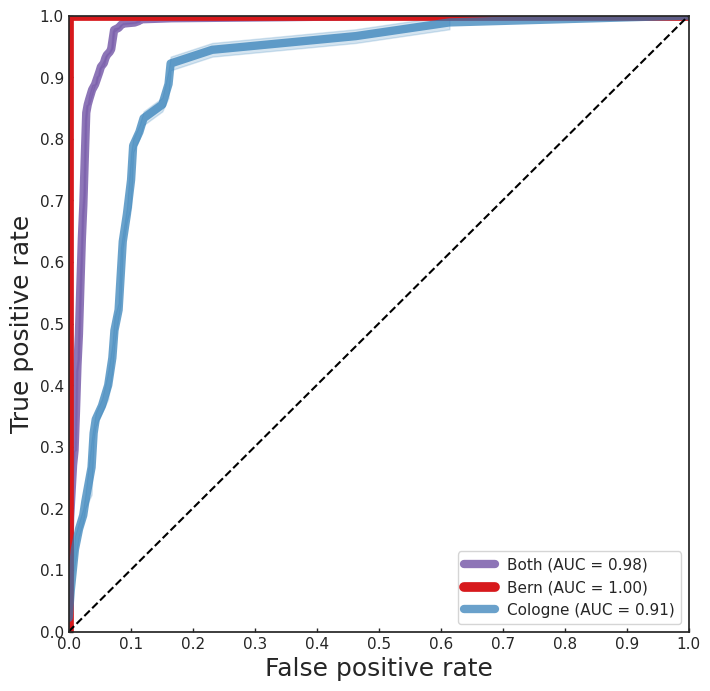

In [7]:
draw_roc(df_loco, mapping=True)

## Classifier ROC

 prediction nans : 0. step_interp_score nans : 0
Debugging merged
Unique labels: [0. 1.]
Length of labels: 5594
Length of predictions: 5594
1.0
in
0.9517155206487231
out


<Figure size 640x480 with 0 Axes>

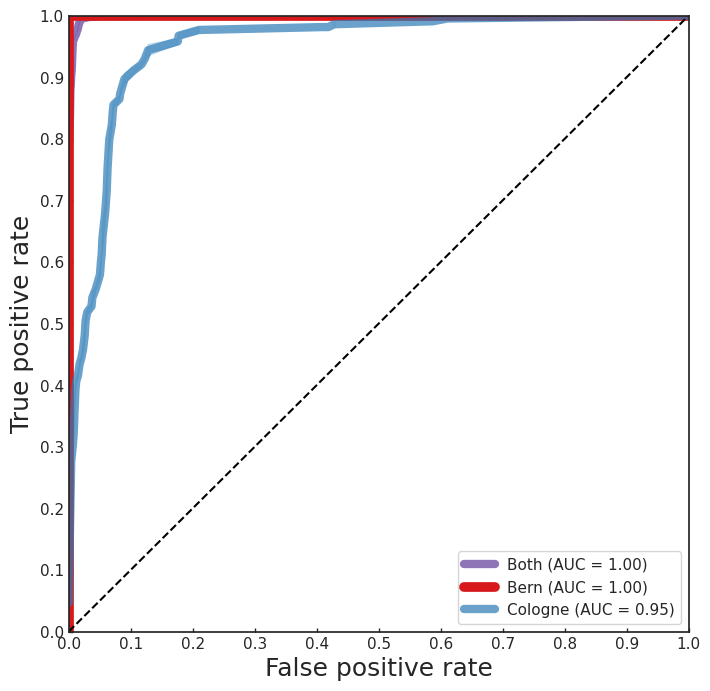

In [8]:
draw_roc(df_loco, mapping=False, label_str='step_interp_score')
#non-mapping roc generation : 2m17s

# Leave-on-patient-out

In [10]:
model_name = 'ProjNetMerged4'
filepaths = glob.glob('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/'
    f'models/predict_lopo/{model_name}/csv/*')

filepaths.sort()

filepath = filepaths[-1]

print(filepath)
#mp = ModelPerformance.load(filepath=filepath)
#mp['Model'] = model_name

df_lopo = pd.read_csv(filepath)
df_lopo = df_lopo[df_lopo['noisy'] == False]
df_lopo = df_lopo[df_lopo['tweening'] == False]

#df = df[df['centerID'] == 'Bern']
df_lopo = df_lopo.drop(columns = ['massive_filename'])
#df = df[['patientID', 'hemisphere', 'contactID', 'amplitude', 'label', 'prediction']]

/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/models/predict_lopo/ProjNetMerged4/csv/23.09.13.17:26:26_es.csv


## Review ROC

 merged_prediction nans : 0. mapping_score nans : 0
Debugging merged
Unique labels: [0. 1.]
Length of labels: 1000
Length of predictions: 1000
1.0
in
0.970096942580164
out


<Figure size 640x480 with 0 Axes>

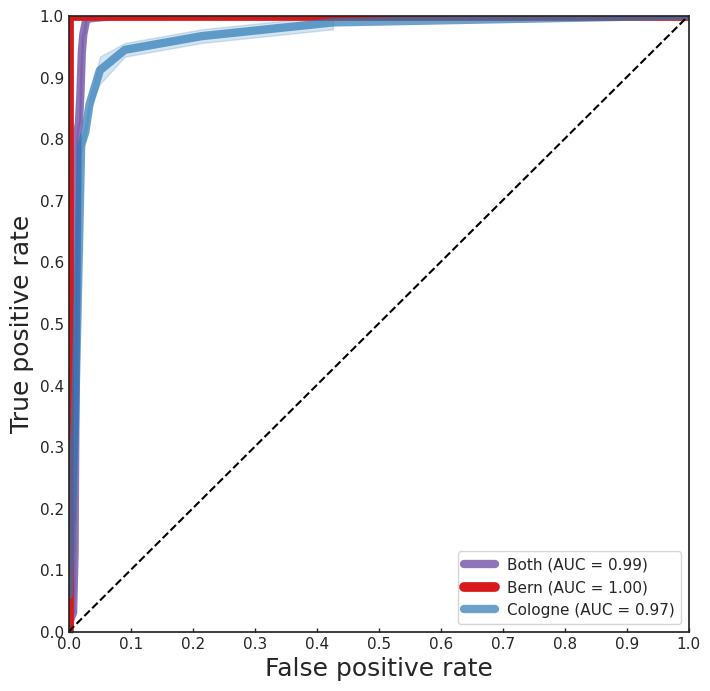

In [11]:
draw_roc(df_lopo, mapping=True, lopo=True)

 merged_prediction nans : 0. step_interp_score nans : 0
Debugging merged
Unique labels: [0. 1.]
Length of labels: 5594
Length of predictions: 5594
0.9999996449308104
in
0.980900409276944
out


<Figure size 640x480 with 0 Axes>

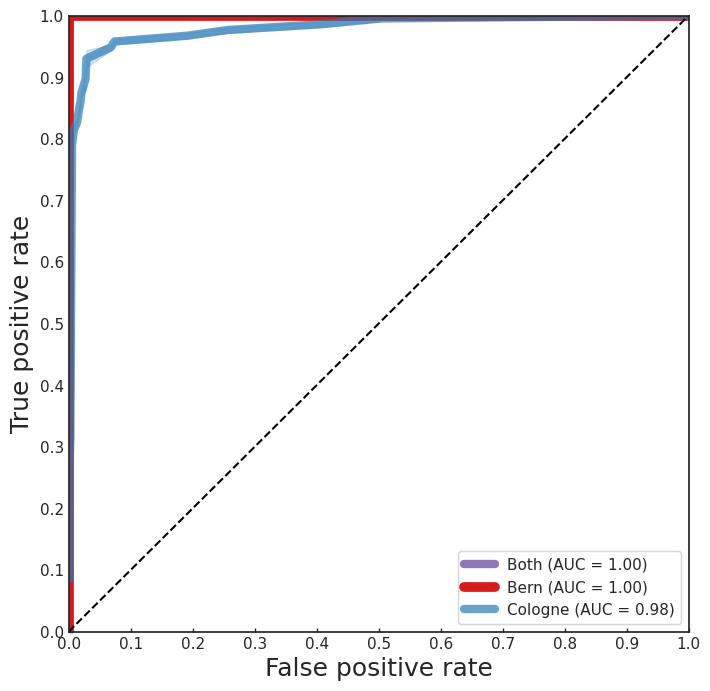

In [12]:
draw_roc(df_lopo, mapping=False, label_str='step_interp_score', lopo=True)